#1. Масштабирование признаков

##Шаг 1: Загрузка и подготовка данных Wine Quality

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wine = pd.read_csv(wine_url, delimiter=';')
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Шаг 2: Масштабирование признаков и визуализация

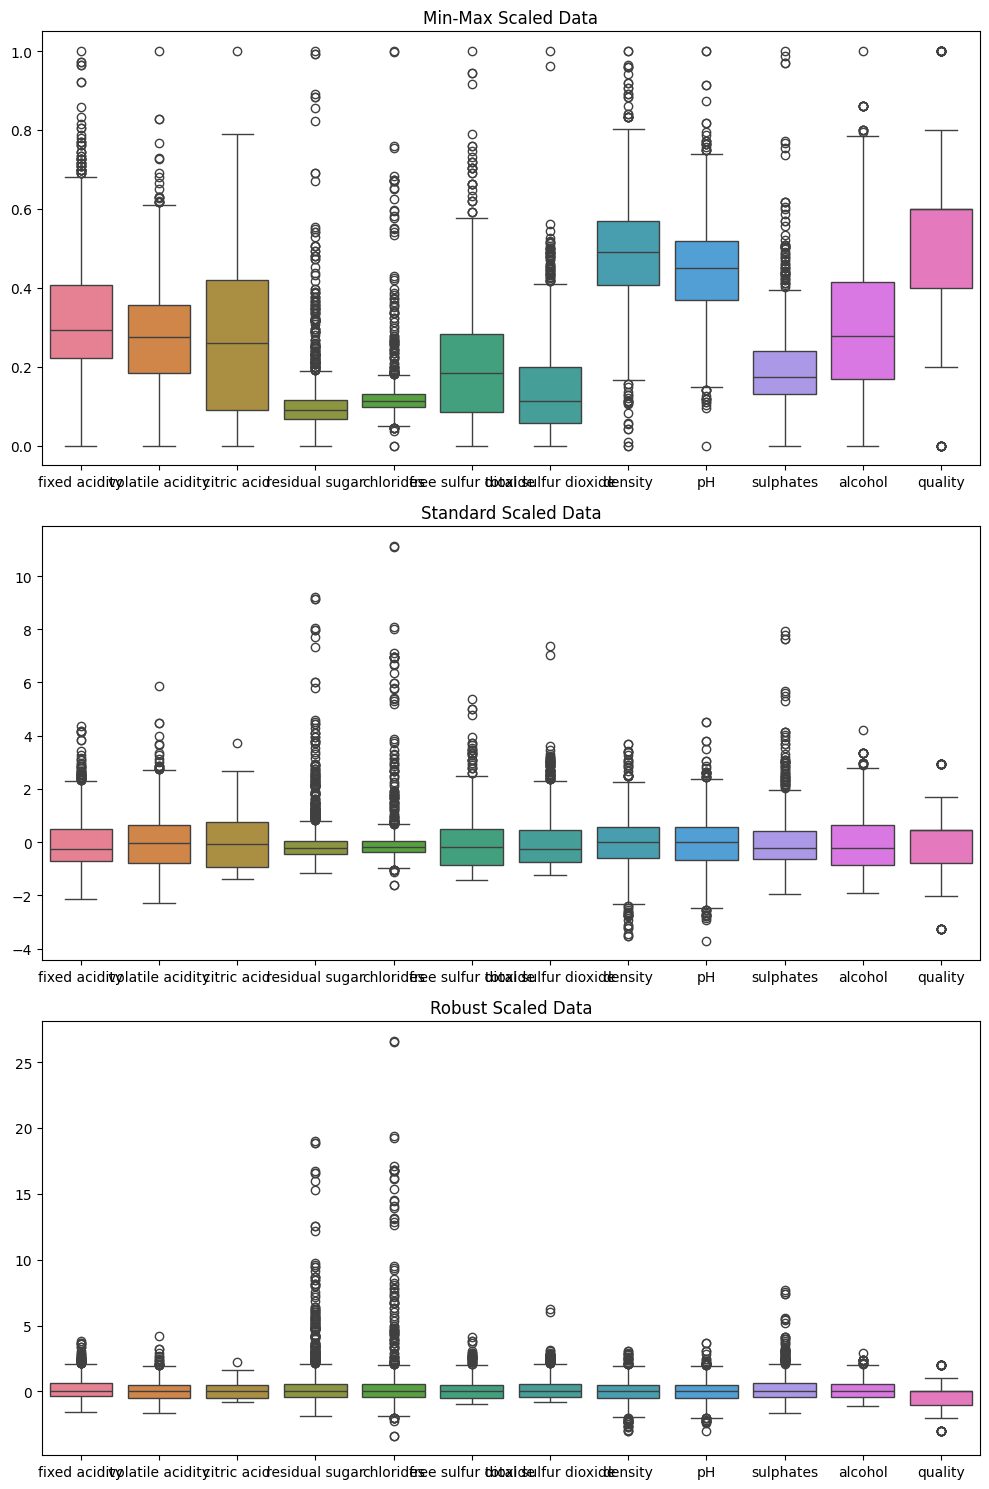

In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Масштабирование данных
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_wine), columns=df_wine.columns)

scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df_wine), columns=df_wine.columns)

scaler_robust = RobustScaler()
df_robust = pd.DataFrame(scaler_robust.fit_transform(df_wine), columns=df_wine.columns)

# Визуализация
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title('Min-Max Scaled Data')

sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title('Standard Scaled Data')

sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title('Robust Scaled Data')

plt.tight_layout()
plt.show()


#2. Обработка выбросов для числовых признаков

##Шаг 1: Нахождение и удаление выбросов и визуализация

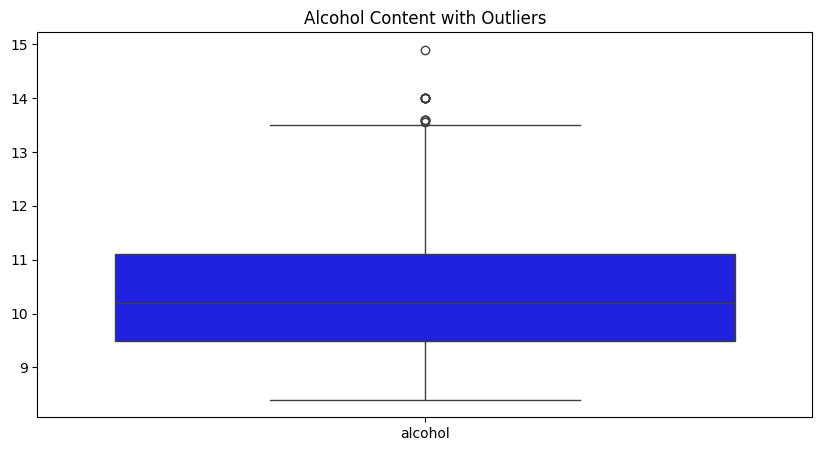

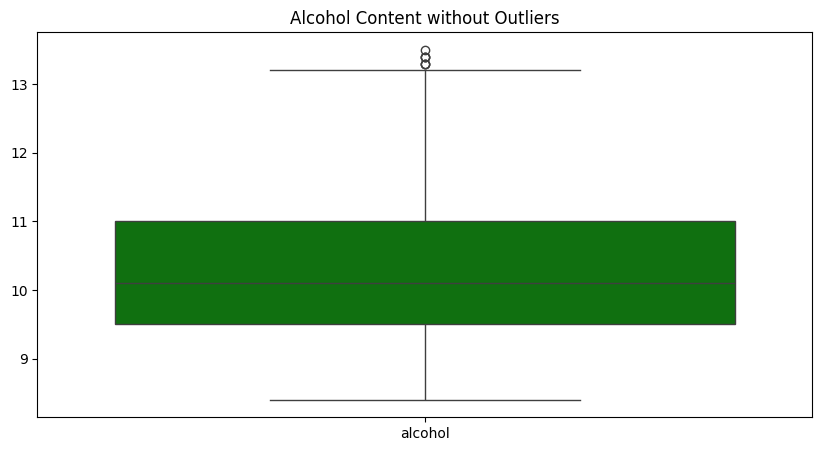

In [54]:
import numpy as np

# Определение функции для нахождения выбросов
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Пример на признаке 'alcohol'
outliers_alcohol = find_outliers(df_wine, 'alcohol')
df_wine_no_outliers = df_wine[~df_wine.index.isin(outliers_alcohol.index)]

# Визуализация
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_wine[['alcohol']], color='blue')
plt.title('Alcohol Content with Outliers')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_wine_no_outliers[['alcohol']], color='green')
plt.title('Alcohol Content without Outliers')
plt.show()


##Шаг 2: Замена выбросов и визуализация

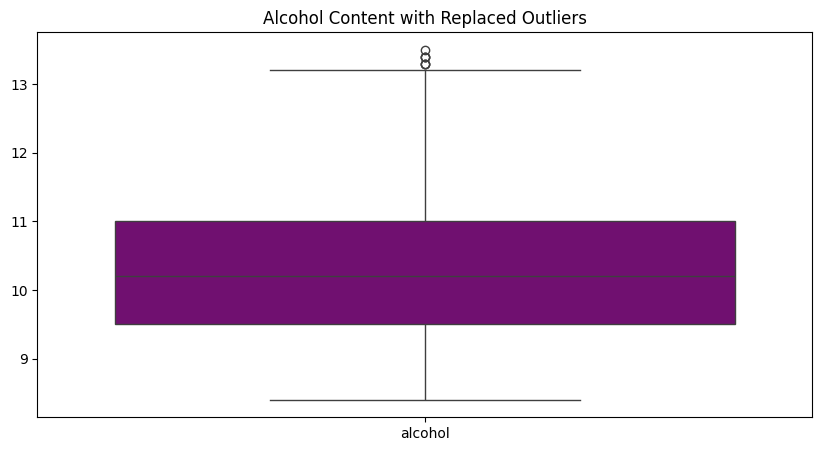

In [55]:
# Замена выбросов на медиану
df_wine_replaced_outliers = df_wine.copy()
median_alcohol = df_wine['alcohol'].median()
df_wine_replaced_outliers.loc[outliers_alcohol.index, 'alcohol'] = median_alcohol

# Визуализация
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_wine_replaced_outliers[['alcohol']], color='purple')
plt.title('Alcohol Content with Replaced Outliers')
plt.show()


#3. Обработка нестандартного признака

##Шаг 1: Загрузка и подготовка данных Heart Disease

In [56]:
heart_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_heart = pd.read_csv(heart_url, names=columns)
print(df_heart.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


##Шаг 2: Обработка нестандартного признака (преобразование признака 'thal')

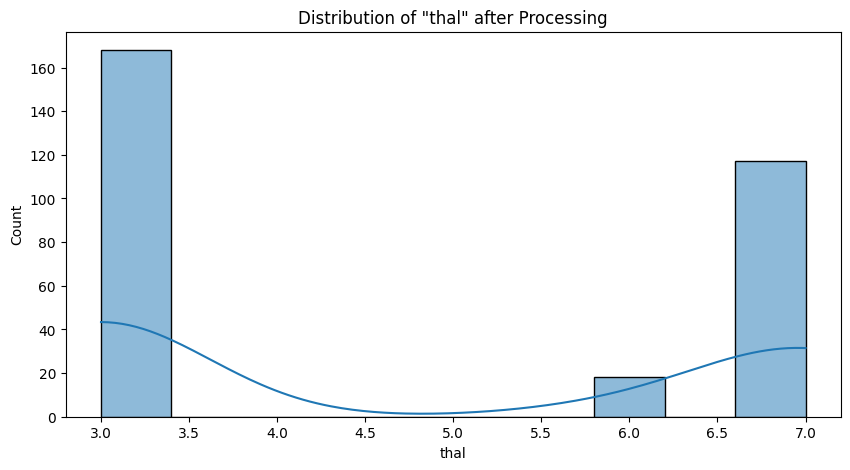

In [57]:
# Замена "?" на NaN и преобразование в числовой тип
df_heart['thal'] = pd.to_numeric(df_heart['thal'], errors='coerce')
df_heart['ca'] = pd.to_numeric(df_heart['ca'], errors='coerce')

# Заполнение пропущенных значений медианой
df_heart['thal'].fillna(df_heart['thal'].median(), inplace=True)
df_heart['ca'].fillna(df_heart['ca'].median(), inplace=True)

# Визуализация
plt.figure(figsize=(10, 5))
sns.histplot(df_heart['thal'], kde=True)
plt.title('Distribution of "thal" after Processing')
plt.show()


#4. Отбор признаков

##Шаг 2: Применение методов отбора признаков

Filter Method: SelectKBest

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_heart.drop(['target'], axis=1)
y = df_heart['target']
X = pd.get_dummies(X)

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Визуализация
print("Selected Features using SelectKBest")
print(selected_features)


Selected Features using SelectKBest
Index(['thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


Wrapper Method: Recursive Feature Elimination (RFE)

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000, solver='liblinear', C=0.5)  # Увеличиваем количество итераций
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_]

# Визуализация
print("Selected Features using RFE")
print(selected_features_rfe)


Selected Features using RFE
Index(['sex', 'fbs', 'exang', 'slope', 'ca'], dtype='object')


Embedded Method: Lasso Regression

In [61]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X, y)
model = SelectFromModel(model_lasso, prefit=True)
selected_features_lasso = X.columns[model.get_support()]

# Визуализация
print("Selected Features using Lasso Regression")
print(selected_features_lasso)


Selected Features using Lasso Regression
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
